<a href="https://colab.research.google.com/github/addo561/Chest-X-ray-model/blob/main/Chest_X_ray_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!conda install pyarrow
!pip install pydicom kornia opencv-python scikit-image nbdev

/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 919.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━

In [2]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *

import pydicom

import pandas as pd

In [4]:
pneumothorax_source=untar_data(URLs.SIIM_SMALL)

In [5]:
items = get_dicom_files(pneumothorax_source/f'train')

In [6]:
trn,val= RandomSplitter()(items)

In [7]:
patient= 7
xray_sample = items[patient].dcmread()

In [8]:
xray_sample

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 202
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.10888.1517875226.128268
(0002,0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.10888.1517875226.128268
(0008,0020) Study Date                          DA: '19010101'
(0008,0030) Study Time                  

In [9]:
xray_sample.PixelData[:200]

b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00\xe0\xac\x13\x02\x00\xff\xd8\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xc0\x00\x0b\x08\x04\x00\x04\x00\x01\x01\x11\x00\xff\xc4\x00\x1d\x00\x00\x02\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x02\x03\x06\x01\x00\x07\x08\t\xff\xc4\x00e\x10\x00\x01\x03\x03\x03\x02\x04\x03\x05\x04\x04\x06\x0b\x0b\x05\x11\x01\x02\x03\x11\x00\x04!\x05\x121AQ\x06\x13"a2q\x81\x07\x08\x14\x91\xa1#B\xb1\xd1\x15R\x92\xc1$3ST\x95\xe1\x16\x17\x18Cbru\xb2\xb3\xd2'

In [10]:
xray_sample.pixel_array, xray_sample.pixel_array.shape

(array([[ 0,  5, 20, ..., 22, 22, 22],
        [ 2, 11, 31, ..., 38, 38, 38],
        [ 0,  9, 31, ..., 38, 38, 38],
        ...,
        [ 0, 17, 54, ..., 25, 26, 26],
        [ 2, 16, 47, ..., 20, 20, 20],
        [ 1,  0,  7, ...,  0,  0,  0]], dtype=uint8),
 (1024, 1024))

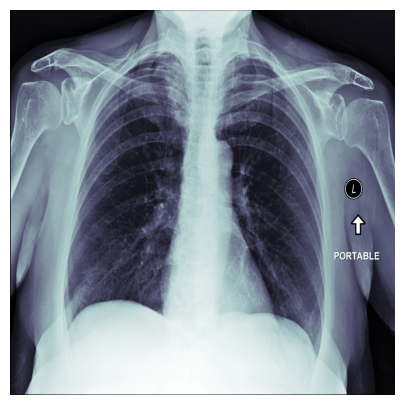

In [11]:
xray_sample.show()

In [12]:
dicom_dataframe = pd.DataFrame.from_dicoms(items)
dicom_dataframe[:5]

,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,ConversionType,ReferringPhysicianName,SeriesDescription,...,HighBit,PixelRepresentation,LossyImageCompression,LossyImageCompressionMethod,fname,img_min,img_max,img_mean,img_std,img_pct_window
0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.4975.1517875185.809916,19010101,000000.00,,CR,WSD,(),view: AP,...,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/No Pneumothorax/000243.dcm,0,255,119.917037,60.351820,0.246454
1,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.1219.1517875166.835208,19010101,000000.00,,CR,WSD,(),view: AP,...,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/No Pneumothorax/000039.dcm,0,232,110.814583,58.920433,0.289951
2,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.12954.1517875242.700587,19010101,000000.00,,CR,WSD,(),view: AP,...,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/No Pneumothorax/000244.dcm,0,255,124.715261,51.732013,0.145900
3,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.5579.1517875188.878457,19010101,000000.00,,CR,WSD,(),view: PA,...,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/No Pneumothorax/000075.dcm,0,245,143.044002,62.883188,0.178876
4,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.31773.1517875156.775880,19010101,000000.00,,CR,WSD,(),view: AP,...,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/No Pneumothorax/000160.dcm,0,255,111.296286,70.710708,0.208520


In [13]:
df = pd.read_csv(pneumothorax_source/f"labels.csv")
df.head()

,file,label
0,train/No Pneumothorax/000000.dcm,No Pneumothorax
1,train/Pneumothorax/000001.dcm,Pneumothorax
2,train/No Pneumothorax/000002.dcm,No Pneumothorax
3,train/Pneumothorax/000003.dcm,Pneumothorax
4,train/Pneumothorax/000004.dcm,Pneumothorax


In [14]:
pneumothorax = DataBlock(blocks=(ImageBlock(cls=PILDicom),CategoryBlock),
                         get_x=lambda x:pneumothorax_source/f'{x[0]}',
                         get_y= lambda x:x[1],
                         batch_tfms=[*aug_transforms(size=224),Normalize.from_stats(*imagenet_stats)])


In [15]:
dls = pneumothorax.dataloaders(df.values,num_workers=0)

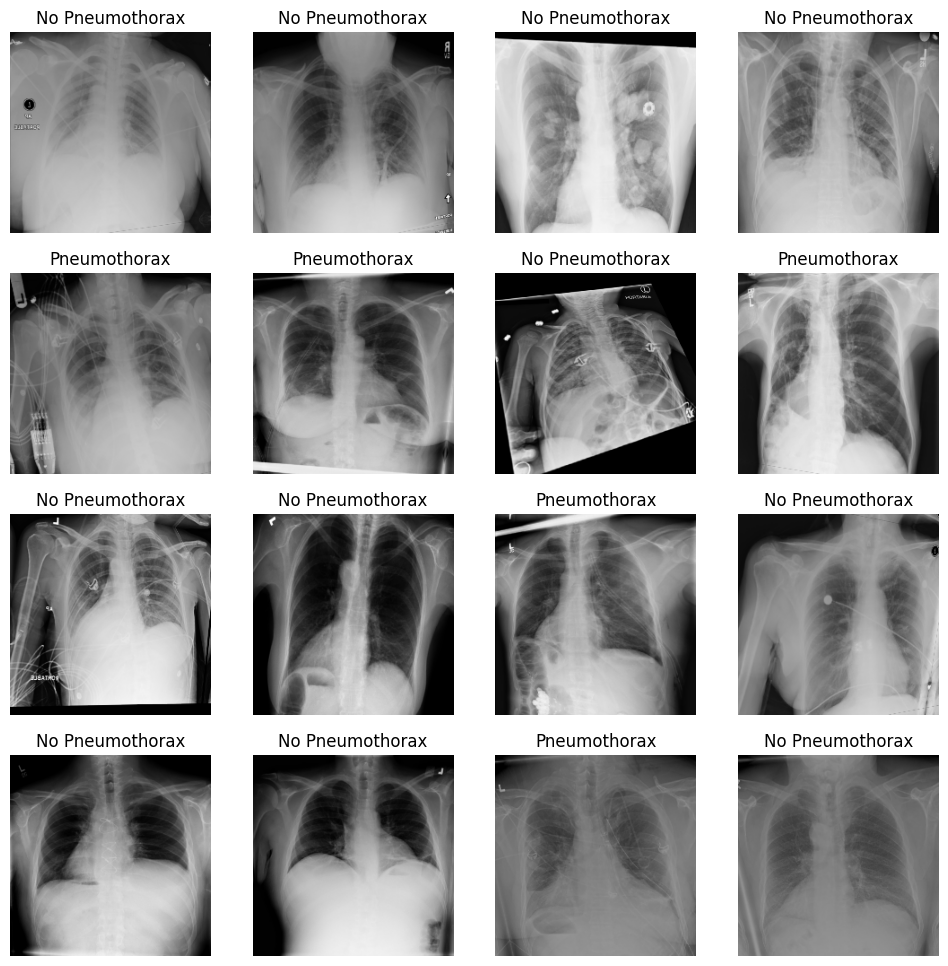

In [16]:
dls = pneumothorax.dataloaders(df.values)
dls.show_batch(max_n=16)

In [17]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 184MB/s]


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0014454397605732083)

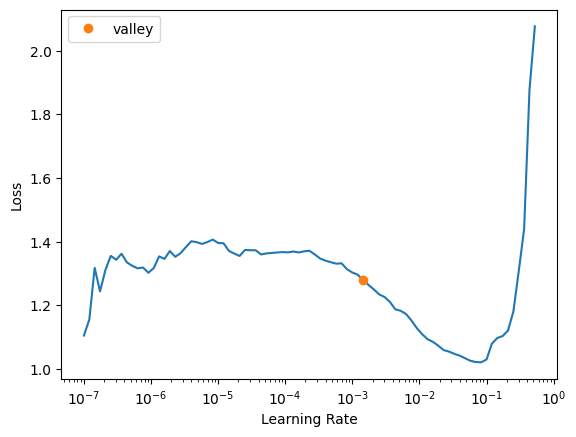

In [18]:
learn.lr_find()

In [19]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.322705,1.974392,0.440000,00:03


In [20]:
tta = learn.tta(use_max=True)

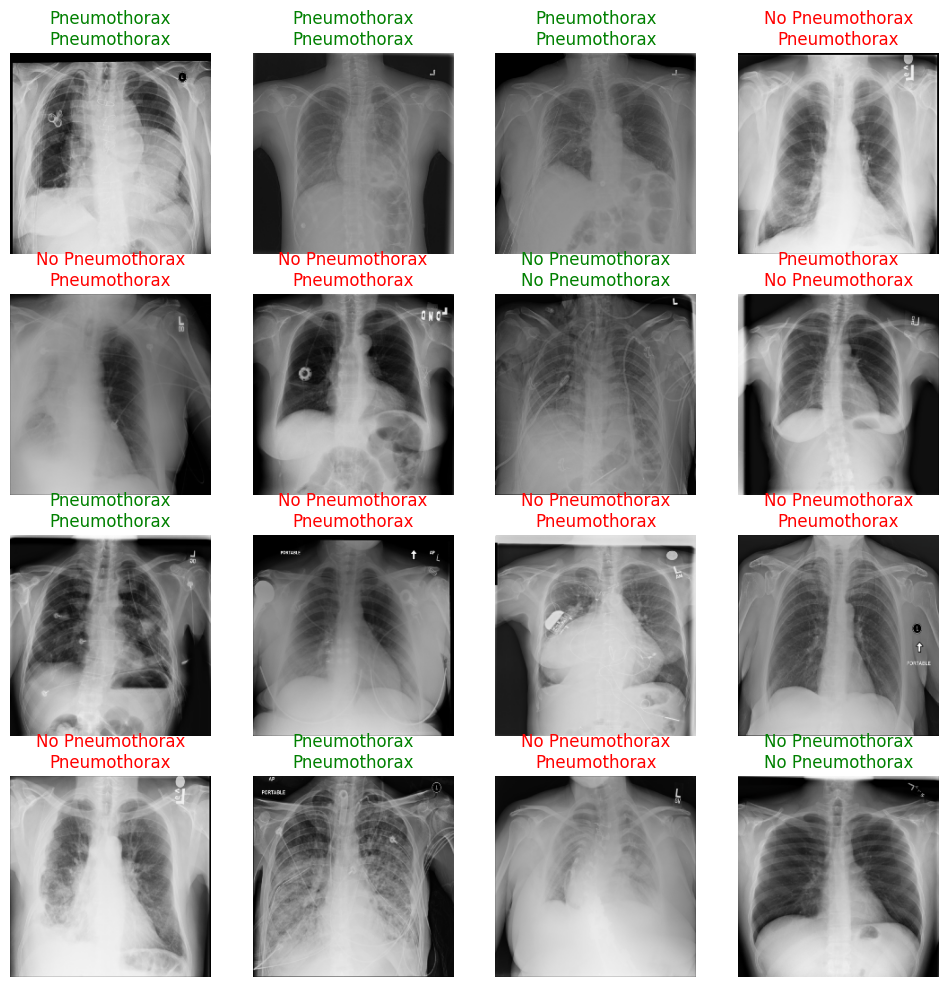

In [21]:
learn.show_results(max_n=16)

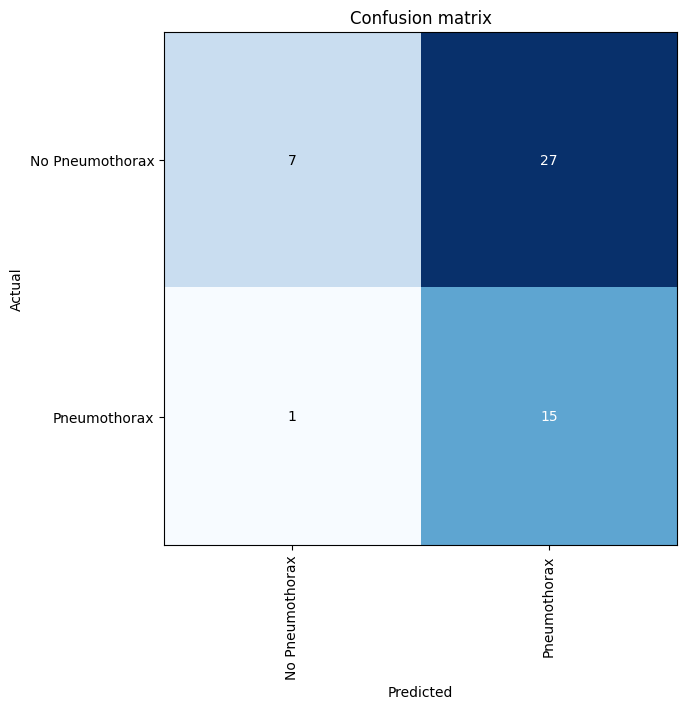

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs= interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

In [35]:
upp, low = interp.confusion_matrix()
tn, fp = upp[0], upp[1]
fn, tp = low[0], low[1]
print(tn, fp, fn, tp)

7 27 1 15


In [36]:
sensitivity = tp/(tp + fn)
sensitivity

0.9375

In [37]:
specificity = tn/(fp + tn)
specificity

0.20588235294117646

In [38]:
ppv = tp/(tp+fp)
ppv

0.35714285714285715

In [39]:
npv = tn/(tn+fn)
npv

0.875

In [40]:
#accuracy = sensitivity x prevalence + specificity * (1 - prevalence)
val = dls.valid_ds.cat
val[0]


<bound method L.cat of TfmdLists: [['train/No Pneumothorax/000045.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000017.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000075.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000143.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000036.dcm' 'No Pneumothorax']
 ['train/Pneumothorax/000238.dcm' 'Pneumothorax']
 ['train/No Pneumothorax/000239.dcm' 'No Pneumothorax']
 ['train/Pneumothorax/000152.dcm' 'Pneumothorax']
 ['train/No Pneumothorax/000022.dcm' 'No Pneumothorax']
 ['train/Pneumothorax/000052.dcm' 'Pneumothorax']
 ['train/Pneumothorax/000021.dcm' 'Pneumothorax']
 ['train/No Pneumothorax/000095.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000141.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000190.dcm' 'No Pneumothorax']
 ['train/Pneumothorax/000013.dcm' 'Pneumothorax']
 ['train/No Pneumothorax/000005.dcm' 'No Pneumothorax']
 ['train/Pneumothorax/000029.dcm' 'Pneumothorax']
 ['train/No Pneumothorax/000037.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000051.dcm' 'No Pneumothorax']
 ['train/Pneumothorax/000145.dcm' 'Pneumothorax']
 ['train/No Pneumothorax/000099.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000175.dcm' 'No Pneumothorax']
 ['train/Pneumothorax/000185.dcm' 'Pneumothorax']
 ['train/No Pneumothorax/000113.dcm' 'No Pneumothorax']
 ['train/Pneumothorax/000058.dcm' 'Pneumothorax']
 ['train/No Pneumothorax/000188.dcm' 'No Pneumothorax']
 ['train/Pneumothorax/000083.dcm' 'Pneumothorax']
 ['train/No Pneumothorax/000210.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000039.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000163.dcm' 'No Pneumothorax']
 ['train/Pneumothorax/000070.dcm' 'Pneumothorax']
 ['train/No Pneumothorax/000006.dcm' 'No Pneumothorax']
 ['train/Pneumothorax/000200.dcm' 'Pneumothorax']
 ['train/No Pneumothorax/000020.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000094.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000196.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000041.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000097.dcm' 'No Pneumothorax']
 ['train/Pneumothorax/000130.dcm' 'Pneumothorax']
 ['train/No Pneumothorax/000018.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000116.dcm' 'No Pneumothorax']
 ['train/Pneumothorax/000158.dcm' 'Pneumothorax']
 ['train/No Pneumothorax/000132.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000122.dcm' 'No Pneumothorax']
 ['train/Pneumothorax/000236.dcm' 'Pneumothorax']
 ['train/No Pneumothorax/000071.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000224.dcm' 'No Pneumothorax']
 ['train/No Pneumothorax/000069.dcm' 'No Pneumothorax']
 ['train/Pneumothorax/000038.dcm' 'Pneumothorax']
 ['train/No Pneumothorax/000054.dcm' 'No Pneumothorax']]
tfms - [<lambda>:
encodes: (object,object) -> <lambda>decodes: , PILDicom.create:
encodes: (Path,object) -> create
(str,object) -> create
(bytes,object) -> createdecodes: ]>

In [41]:
prevalence = 15/50
prevalence

0.3

In [42]:
accuracy = (sensitivity * prevalence) + (specificity * (1 - prevalence))
accuracy

0.4253676470588235